In [1]:
import nest
import numpy as np
import matplotlib.pyplot as plt

## GIDCollections

In [2]:
nodes_alpha = nest.Create('iaf_psc_alpha', 10)
print(nodes_alpha)

GIDCollection(metadata=None, model=iaf_psc_alpha, size=10, first=1, last=10)


In [3]:
print(nodes_alpha[2:8])

GIDCollection(metadata=None, model=iaf_psc_alpha, size=6, first=3, last=8)


In [4]:
print(nodes_alpha[::2])

GIDCollection(metadata=None,
              model=iaf_psc_alpha, size=5, first=1, last=9, step=2)


In [5]:
nodes_exp = nest.Create('iaf_psc_exp', 5)
nodes = nodes_alpha + nodes_exp
print(nodes)

GIDCollection(metadata=None,
              model=iaf_psc_alpha, size=10, first=1, last=10;
              model=iaf_psc_exp, size=5, first=11, last=15)


In [6]:
nodes_exp[:3].get()

{'archiver_length': (0, 0, 0),
 'beta_Ca': (0.001, 0.001, 0.001),
 'C_m': (250.0, 250.0, 250.0),
 'Ca': (0.0, 0.0, 0.0),
 'delta': (0.0, 0.0, 0.0),
 'E_L': (-70.0, -70.0, -70.0),
 'element_type': ('neuron', 'neuron', 'neuron'),
 'frozen': (False, False, False),
 'global_id': (11, 12, 13),
 'I_e': (0.0, 0.0, 0.0),
 'local': (True, True, True),
 'model': ('iaf_psc_exp', 'iaf_psc_exp', 'iaf_psc_exp'),
 'node_uses_wfr': (False, False, False),
 'post_trace': (0.0, 0.0, 0.0),
 'recordables': (('I_syn_ex',
   'I_syn_in',
   'V_m',
   'weighted_spikes_ex',
   'weighted_spikes_in'),
  ('I_syn_ex', 'I_syn_in', 'V_m', 'weighted_spikes_ex', 'weighted_spikes_in'),
  ('I_syn_ex', 'I_syn_in', 'V_m', 'weighted_spikes_ex', 'weighted_spikes_in')),
 'rho': (0.01, 0.01, 0.01),
 'supports_precise_spikes': (False, False, False),
 'synaptic_elements': ({}, {}, {}),
 't_ref': (2.0, 2.0, 2.0),
 't_spike': (-1.0, -1.0, -1.0),
 'tau_Ca': (10000.0, 10000.0, 10000.0),
 'tau_m': (10.0, 10.0, 10.0),
 'tau_minus': (2

In [7]:
nodes = nest.Create('iaf_psc_alpha', 10, {'V_m': -55.})
nodes.get('V_m')

(-55.0, -55.0, -55.0, -55.0, -55.0, -55.0, -55.0, -55.0, -55.0, -55.0)

In [8]:
nodes.set({'V_reset': [-65.0 + n for n in range(10)]})
nodes.get(['V_m', 'V_reset'])

{'V_m': (-55.0, -55.0, -55.0, -55.0, -55.0, -55.0, -55.0, -55.0, -55.0, -55.0),
 'V_reset': (-65.0,
  -64.0,
  -63.0,
  -62.0,
  -61.0,
  -60.0,
  -59.0,
  -58.0,
  -57.0,
  -56.0)}

In [9]:
for n in nodes[::3]:
    print(n)

16
19
22
25


In [10]:
for n, model_id in nodes.items():
    print('GID: {}, model ID: {}'.format(n, model_id))

GID: 16, model ID: 18
GID: 17, model ID: 18
GID: 18, model ID: 18
GID: 19, model ID: 18
GID: 20, model ID: 18
GID: 21, model ID: 18
GID: 22, model ID: 18
GID: 23, model ID: 18
GID: 24, model ID: 18
GID: 25, model ID: 18


In [11]:
nest.ResetKernel()
nodes.get()  # raises InvalidGIDCollection

NESTErrors.InvalidGIDCollection: ('InvalidGIDCollection in GetStatus_g: ', 'InvalidGIDCollection', 'GetStatus_g', ': ')

## Parameterization

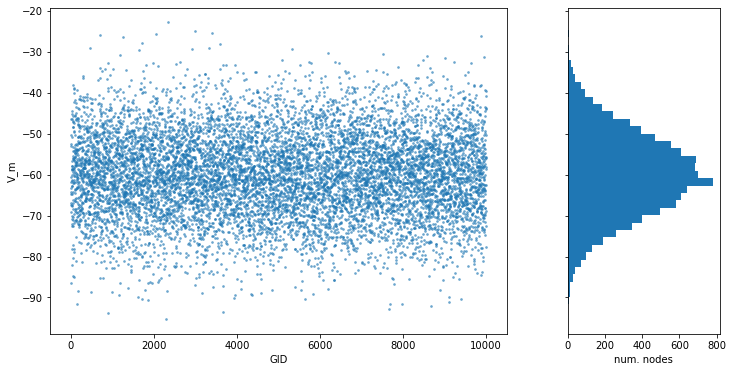

In [12]:
nest.ResetKernel()

n = nest.Create('iaf_psc_alpha', 10000, {'V_m': nest.random.normal(loc=-60., scale=10.)})

gids = n.get('global_id')
v_m = n.get('V_m')
fig, ax = plt.subplots(figsize=(12, 6), 
                       gridspec_kw={'width_ratios': 
                                    [3, 1]}, 
                       ncols=2,
                       sharey=True)
ax[0].plot(gids, v_m, '.', alpha=0.5, ms=3.5)
ax[0].set_xlabel('GID');
ax[1].hist(v_m, bins=40, orientation='horizontal');
ax[1].set_xlabel('num. nodes');
ax[0].set_ylabel('V_m');

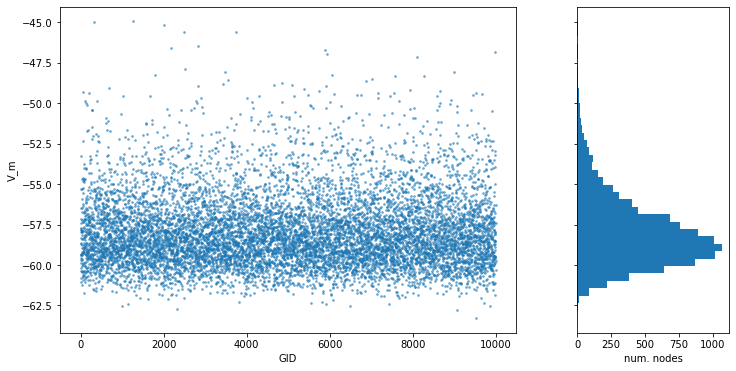

In [13]:
nest.ResetKernel()

n = nest.Create('iaf_psc_alpha', 10000, {'V_m': -60 + 2*nest.random.exponential() + nest.random.normal()})

gids = n.get('global_id')
v_m = n.get('V_m')
fig, ax = plt.subplots(figsize=(12, 6), 
                       gridspec_kw={'width_ratios': [3, 1]}, 
                       ncols=2,
                       sharey=True)
ax[0].plot(gids, v_m, '.', alpha=0.5, ms=3.5)
ax[0].set_xlabel('GID');
ax[1].hist(v_m, bins=40, orientation='horizontal');
ax[1].set_xlabel('num. nodes');
ax[0].set_ylabel('V_m');

## Connecting

In [14]:
nest.ResetKernel()

n = nest.Create('iaf_psc_alpha', 200)
nest.Connect(n, n, syn_spec={'weight': nest.random.exponential(scale=0.4)})

conns = nest.GetConnections()
weights = conns.get('weight')
print(weights[:10])

[0.21088282805971265, 0.15657555664733017, 0.6554309097531537, 0.37681366198069244, 0.7558248149006221, 0.4509586111884833, 0.0849105474425321, 1.5868739883995078, 0.04972731121045684, 0.2983155067483565]


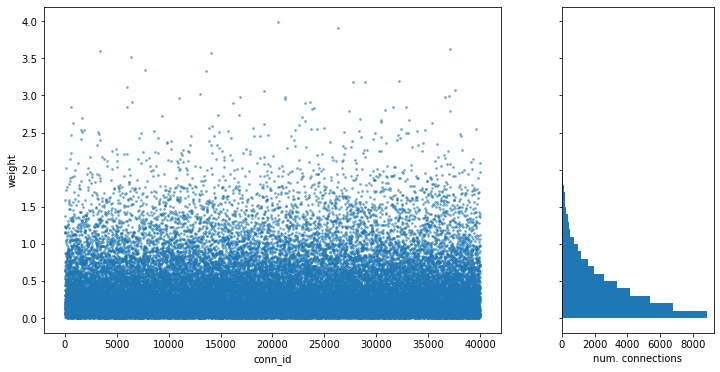

In [15]:
conn_id = range(len(weights))
fig, ax = plt.subplots(figsize=(12, 6), 
                       gridspec_kw={'width_ratios': [3, 1]}, 
                       ncols=2,
                       sharey=True)
ax[0].plot(conn_id, weights, '.', alpha=0.5, ms=3.5)
ax[0].set_xlabel('conn_id');
ax[1].hist(weights, bins=40, orientation='horizontal');
ax[1].set_xlabel('num. connections');
ax[0].set_ylabel('weight');

## Spatial

In [16]:
nest.ResetKernel()

grid_layer = nest.Create('iaf_psc_alpha',
                         positions=nest.spatial.grid(rows=2, columns=2, center=[1., 1.]))

free_layer = nest.Create('iaf_psc_alpha', 4,
                         positions=nest.spatial.free([[1., 1.], [2., 2.], [3., 3.], [4., 4.]]))
print(grid_layer)

GIDCollection(metadata=spatial, model=iaf_psc_alpha, size=4, first=1, last=4)


In [17]:
grid_layer.get('V_m')

(-70.0, -70.0, -70.0, -70.0)

In [18]:
grid_layer.spatial

{'network_size': 4,
 'center': (1.0, 1.0),
 'columns': 2,
 'edge_wrap': False,
 'extent': (1.0, 1.0),
 'rows': 2}

In [19]:
free_layer.spatial

{'network_size': 4,
 'center': (2.5, 2.5),
 'edge_wrap': False,
 'extent': (3.2, 3.2),
 'positions': ((1.0, 1.0), (2.0, 2.0), (3.0, 3.0), (4.0, 4.0))}

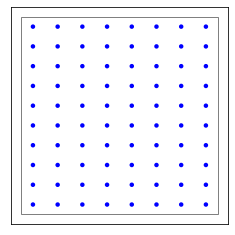

In [20]:
grid_layer = nest.Create('iaf_psc_alpha',
                         positions=nest.spatial.grid(rows=10, columns=8))
nest.PlotLayer(grid_layer);

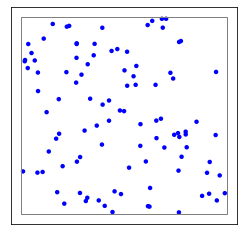

In [21]:
free_layer = nest.Create('iaf_psc_alpha', 100,
                         positions=nest.spatial.free(nest.random.uniform(min=0., max=10.), num_dimensions=2))
nest.PlotLayer(free_layer);

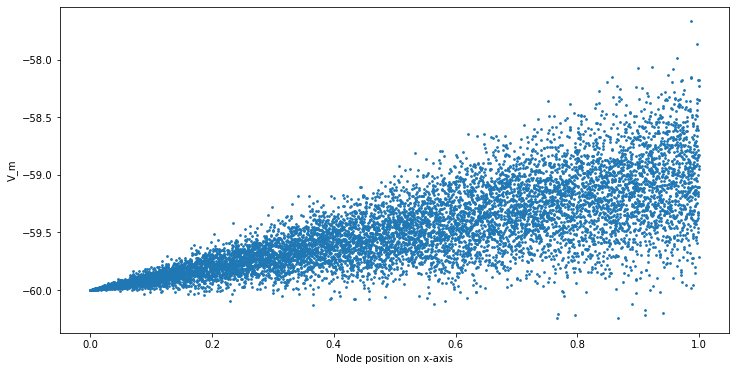

In [22]:
nest.ResetKernel()

positions = nest.spatial.free([[x, 0.5*x] for x in np.linspace(0, 1.0, 10000)])
layer = nest.Create('iaf_psc_alpha', positions=positions)

parameter = -60 + nest.spatial.pos.x + (0.4 * nest.spatial.pos.x * nest.random.normal())
layer.set({'V_m': parameter})

node_pos = np.array(nest.GetPosition(layer))
node_pos[:,1]
v_m = layer.get('V_m');

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(node_pos[:,0], v_m, '.', ms=3.5)
ax.set_xlabel('Node position on x-axis')
ax.set_ylabel('V_m');

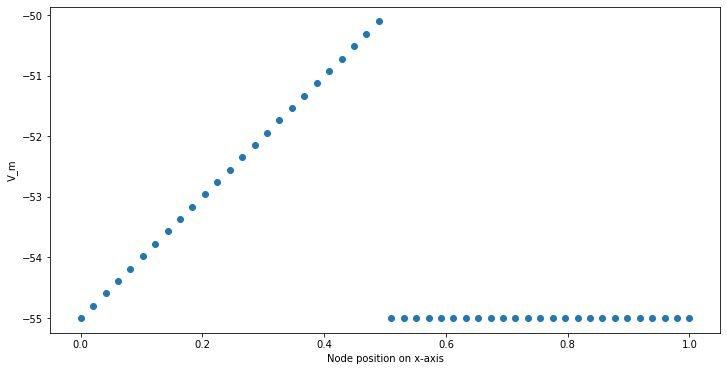

In [23]:
nest.ResetKernel()

positions = nest.spatial.free([[x, 0.5*x] for x in np.linspace(0, 1.0, 50)])
layer = nest.Create('iaf_psc_alpha', positions=positions)

layer.set({'V_m': nest.logic.conditional(nest.spatial.pos.x < 0.5,
                                         -55 + 10*nest.spatial.pos.x,
                                         -55)})

node_pos = np.array(nest.GetPosition(layer))
node_pos[:,1]
v_m = layer.get('V_m');

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(node_pos[:,0], v_m, 'o')
ax.set_xlabel('Node position on x-axis')
ax.set_ylabel('V_m');

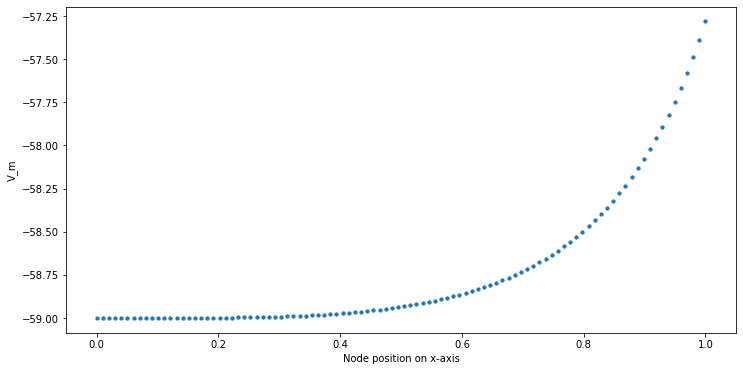

In [24]:
nest.ResetKernel()

positions = nest.spatial.free([[x, 0.5*x] for x in np.linspace(0, 1.0, 100)])
layer = nest.Create('iaf_psc_alpha', positions=positions)

parameter = -60 + nest.math.exp(nest.spatial.pos.x**4)
# Also available:
#   - nest.math.sin()
#   - nest.math.cos()
print(parameter)
layer.set({'V_m': parameter})

node_pos = np.array(nest.GetPosition(layer))
node_pos[:,1]
v_m = layer.get('V_m');

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(node_pos[:,0], v_m, '.', ms=6.5)
ax.set_xlabel('Node position on x-axis')
ax.set_ylabel('V_m');

### Connecting with spatial GIDCollections

In [ ]:
nest.ResetKernel()

positions = nest.spatial.free(nest.random.uniform(), num_dimensions=2)
layer = nest.Create('iaf_psc_alpha', 10, positions=positions)

nest.Connect(layer, layer)

len(nest.GetConnections())

#### Connection rules

| Old  | New  |
|---|---|
| `convergent`  |  `pairwise_bernoulli` and `use_on_source=True`  |
| `convergent` and `num_connections`  | `fixed_indegree` |
| `divergent`  | `pairwise_bernoulli`  |
| `divergent` and `num_connections`  | `fixed_outdegree`  |

In [25]:
nest.ResetKernel()

positions = nest.spatial.free(nest.random.uniform(), num_dimensions=2)
layer = nest.Create('iaf_psc_alpha', 10, positions=positions)

nest.Connect(layer, layer, conn_spec={'rule': 'fixed_indegree', 'indegree': 2})

print('Num. connections:', len(nest.GetConnections()))

Num. connections: 20


In [26]:
nest.ResetKernel()

positions = nest.spatial.free(nest.random.uniform(), num_dimensions=2)
layer = nest.Create('iaf_psc_alpha', 10, positions=positions)

nest.Connect(layer, layer, conn_spec={'rule': 'pairwise_bernoulli',
                                      'p': 0.5,
                                      'use_on_source': True})

print('Num. connections:', len(nest.GetConnections()))

Num. connections: 58


In [27]:
nest.ResetKernel()

positions = nest.spatial.free(nest.random.uniform(), num_dimensions=2)
layer = nest.Create('iaf_psc_alpha', 10, positions=positions)

parameter = nest.spatial.distance

nest.Connect(layer, layer, conn_spec={'rule': 'pairwise_bernoulli',
                                      'p': parameter})

print('Num. connections:', len(nest.GetConnections()))

Num. connections: 51


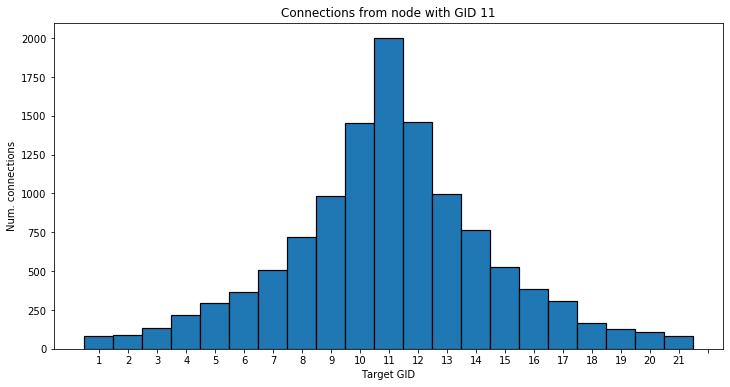

In [28]:
nest.ResetKernel()

N = 21
middle_node = N//2

positions = nest.spatial.free([[x, 0.] for x in np.linspace(0, 1.0, N)])
layer = nest.Create('iaf_psc_alpha', positions=positions)

parameter = nest.distributions.exponential(nest.spatial.distance, a=1.0, tau=0.15)

# Iterate connection to get statistical connection data
for _ in range(2000):
    nest.Connect(layer[middle_node], layer,
                 conn_spec={'rule': 'pairwise_bernoulli',
                            'p': parameter})

targets = nest.GetConnections().get('target')

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.hist(targets, bins=N, edgecolor='black', linewidth=1.2)

plt.xticks(bars[1] + 0.5,np.arange(1, N+1))
ax.set_title('Connections from node with GID {}'.format(layer[middle_node].get('global_id')))
ax.set_xlabel('Target GID')
ax.set_ylabel('Num. connections');
